In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv("movies.csv",delimiter='::',header=None,engine='python')

In [3]:
movies.head()

,0,1,2
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines LumiÃ¨re (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


In [4]:
ratings=pd.read_csv("ratings.csv",delimiter='::',header=None,engine='python')

In [5]:
ratings.head()

,0,1,2,3
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524


In [6]:
movies.columns=['ID','TITLE','GENRE']

In [7]:
ratings.columns=['USER','ID','RATINGS','TIMESTAMP']

In [8]:
movies.head()

,ID,TITLE,GENRE
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines LumiÃ¨re (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


In [9]:
ratings.head()

,USER,ID,RATINGS,TIMESTAMP
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524


In [10]:
data=pd.merge(movies,ratings,on=["ID","ID"])

In [11]:
data.head()

,ID,TITLE,GENRE,USER,RATINGS,TIMESTAMP
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,42898,5,1396981211
1,10,La sortie des usines LumiÃ¨re (1895),Documentary|Short,70577,10,1412878553
2,12,The Arrival of a Train (1896),Documentary|Short,69535,10,1439248579
3,25,The Oxford and Cambridge University Boat Race ...,NaN,37628,8,1488189899
4,91,Le manoir du diable (1896),Short|Horror,5814,6,1385233195


In [12]:
data.shape

(908634, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908634 entries, 0 to 908633
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         908634 non-null  int64 
 1   TITLE      908634 non-null  object
 2   GENRE      908274 non-null  object
 3   USER       908634 non-null  int64 
 4   RATINGS    908634 non-null  int64 
 5   TIMESTAMP  908634 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 48.5+ MB


In [14]:
data.describe()

,ID,USER,RATINGS,TIMESTAMP
count,9.086340e+05,908634.000000,908634.000000,9.086340e+05
mean,2.241566e+06,35595.332286,7.316809,1.462609e+09
std,2.123461e+06,20522.745150,1.852670,7.184972e+07
min,8.000000e+00,1.000000,0.000000,1.362062e+09
25%,7.654290e+05,18134.000000,6.000000,1.397168e+09
50%,1.726592e+06,35396.000000,8.000000,1.452147e+09
75%,2.948356e+06,53034.000000,9.000000,1.518353e+09
max,1.474090e+07,70783.000000,10.000000,1.623118e+09


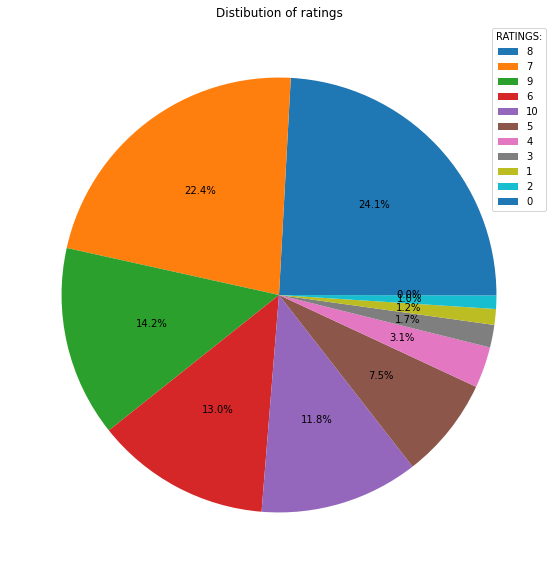

In [15]:
ratings=data['RATINGS'].value_counts()
numbers = ratings.index
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(ratings,autopct='%1.1f%%')
plt.title('Distibution of ratings')
plt.legend(title = "RATINGS:",loc='upper right',labels=numbers)
plt.show()

In [16]:
data2 = data.query("RATINGS == 10")

In [17]:
#top 10 movies with 10 ratings
data2['TITLE'].value_counts().head(10)

Joker (2019)                       1479
Interstellar (2014)                1386
1917 (2019)                         820
Avengers: Endgame (2019)            812
The Shawshank Redemption (1994)     707
Gravity (2013)                      653
The Wolf of Wall Street (2013)      581
Hacksaw Ridge (2016)                570
Avengers: Infinity War (2018)       535
La La Land (2016)                   510
Name: TITLE, dtype: int64

In [18]:
#Here Joker (2019) got the highest number of 10 ratings from viewers